In [ ]:
import pandas as pd
df=pd.read_csv("HateSpeechData.csv")
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
pip install textstat

In [ ]:
import pandas as panda
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
df["text_length"]=df["tweet"].apply(len)

In [ ]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,text_length
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,146
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",70
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,67
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,37


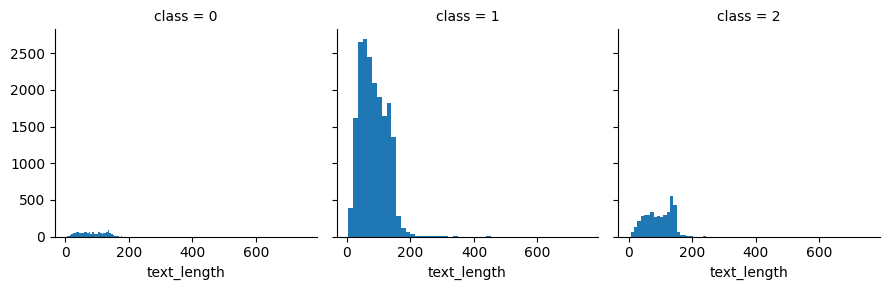

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
graph=sns.FacetGrid(data=df,col="class")
graph.map(plt.hist,"text_length",bins=50)

<Axes: xlabel='class', ylabel='text_length'>

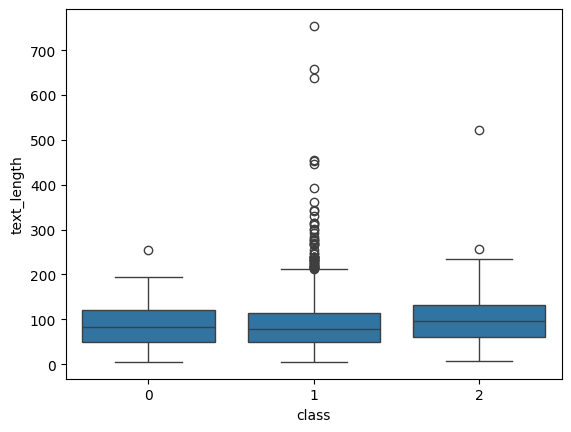

In [ ]:
sns.boxplot(x="class",y="text_length",data=df)

<Axes: >

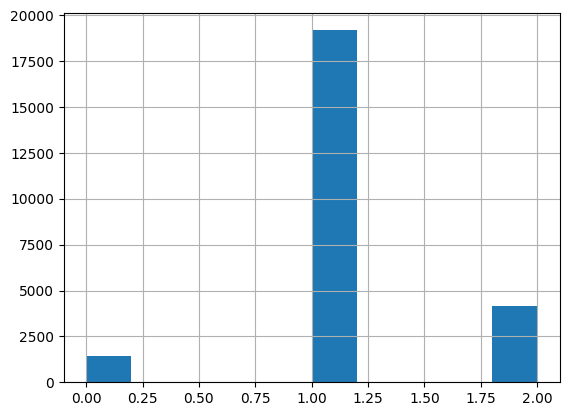

In [ ]:
df["class"].hist()

In [ ]:
tweet=df.tweet

In [ ]:
tweet

,tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,"you've gone and broke the wrong heart baby, an..."
24780,young buck wanna eat!!.. dat nigguh like I ain...
24781,youu got wild bitches tellin you lies


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
other=["#ff","FF","rt"]
stopwords.extend(other)

In [ ]:
stemmer=PorterStemmer()

In [ ]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stopwords_set = set(stopwords.words("english"))

def preprocess(tweet):
    # Remove multiple spaces
    tweet = tweet.str.replace(r'\s+', ' ', regex=True)

    # Remove mentions
    tweet = tweet.str.replace(r'@[\w\-]+', '', regex=True)

    # Remove URLs
    giant_url_regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    tweet = tweet.str.replace(giant_url_regex, '', regex=True)

    # Remove non-alphabet characters
    tweet = tweet.str.replace(r'[^a-zA-Z]', ' ', regex=True)

    # Remove leading/trailing whitespace
    tweet = tweet.str.strip()

    # Replace numbers with the word 'numbr'
    tweet = tweet.str.replace(r'\d+(\.\d+)?', 'numbr', regex=True)

    # Convert to lowercase
    tweet = tweet.str.lower()

    # Tokenize, remove stopwords, and apply stemming
    tweet = tweet.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split() if word not in stopwords_set]))

    return tweet

# Example usage with a DataFrame
df = pd.DataFrame({'tweet': ["@user Check this out! https://example.com",
                             "Python 3.9 is awesome #Python",
                             "I scored 95% on my test!!!"]})

df['processed_tweets'] = preprocess(df['tweet'])
print(df[['tweet', 'processed_tweets']])


                                       tweet      processed_tweets
0  @user Check this out! https://example.com                 check
1              Python 3.9 is awesome #Python  python awesom python
2                 I scored 95% on my test!!!            score test


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in df['processed_tweets'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

In [ ]:
import pandas as panda
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
dataset = panda.read_csv("HateSpeechData.csv")
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
# Adding text-length as a field in the dataset
dataset['text length'] = dataset['tweet'].apply(len)
print(dataset.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  text length  
0  !!! RT @mayasolovely: As a woman you shouldn't...          140  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...           85  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...          120  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...           62  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...          137  


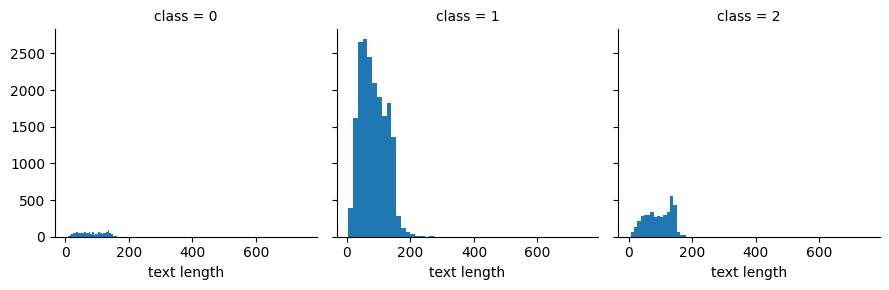

In [ ]:
#Basic visualization of data using histograms
# FacetGrid- Multi-plot grid for plotting conditional relationships
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=dataset, col='class')
graph.map(plt.hist, 'text length', bins=50)

<Axes: xlabel='class', ylabel='text length'>

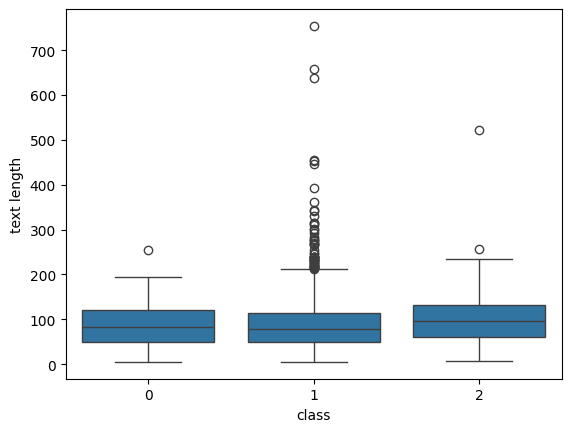

In [ ]:

# Box-plot visvualization
sns.boxplot(x='class', y='text length', data=dataset)

<Axes: >

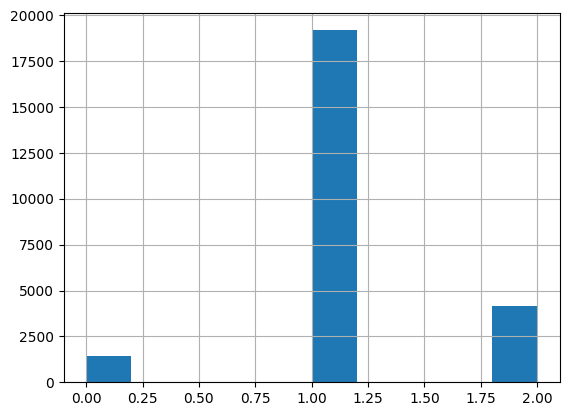

In [ ]:
dataset['class'].hist()

In [ ]:
# collecting only the tweets from the csv file into a variable name tweet
tweet=dataset.tweet

In [ ]:
## 1. Removal of punctuation and capitlization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming

stopwords = nltk.corpus.stopwords.words("english")

#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

def preprocess(tweet):

  # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ', regex=True)

# removal of @name[mention]
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '', regex=True)

# removal of links[https://abc.com]
    giant_url_regex = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
                             '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '', regex=True)

# removal of punctuations and numbers
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ", regex=True)
# remove whitespace with a single space
    newtweet = punc_remove.str.replace(r'\s+', ' ', regex=True)
# remove leading and trailing whitespace
    newtweet = newtweet.str.replace(r'^\s+|\s+?$', '', regex=True)
# replace normal numbers with numbr
    newtweet = newtweet.str.replace(r'\d+(\.\d+)?', 'numbr', regex=True)

    # removal of capitalization
    tweet_lower = newtweet.str.lower()

    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())

    # removal of stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])

    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet

    return tweets_p

processed_tweets = preprocess(tweet)

dataset['processed_tweets'] = processed_tweets
print(dataset[["tweet","processed_tweets"]].head(10))

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...   
6  !!!!!!"@__BrighterDays: I can not just sit up ...   
7  !!!!&#8220;@selfiequeenbri: cause I'm tired of...   
8  " &amp; you might not get ya bitch back &amp; ...   
9  " @rhythmixx_ :hobbies include: fighting Maria...   

                                    processed_tweets  
0  woman complain clean hous amp man alway take t...  
1  boy dat cold tyga dwn bad cuffin dat hoe st place  
2         dawg ever fuck bitch start cri confus shit  
3                                   look like tranni  
4     shit hear might true might faker bitch told ya  
5      shit blow claim faith somebodi still fuck hoe 

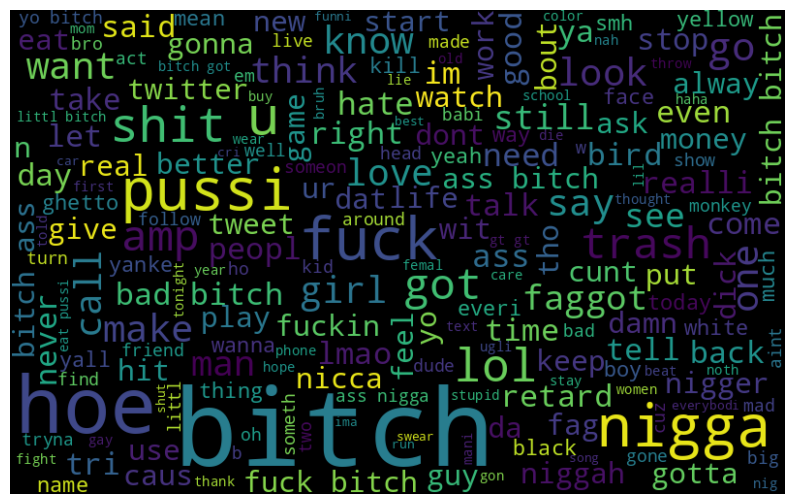

In [ ]:
# visualizing which of the word is most commonly used in the twitter dataset
from wordcloud import WordCloud
# imshow-Display data as an image
# interpolation - https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html
all_words = ' '.join([text for text in dataset['processed_tweets'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

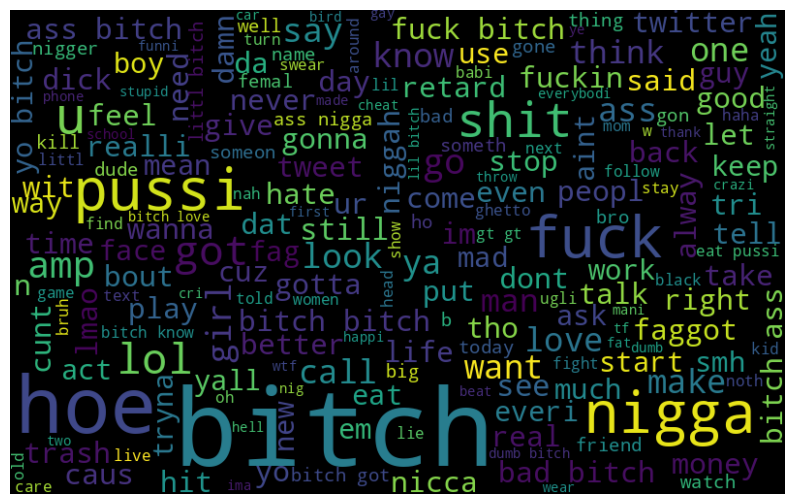

In [ ]:


hatred_words=' '.join([text for text in dataset['processed_tweets'][dataset['class']==1]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(hatred_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

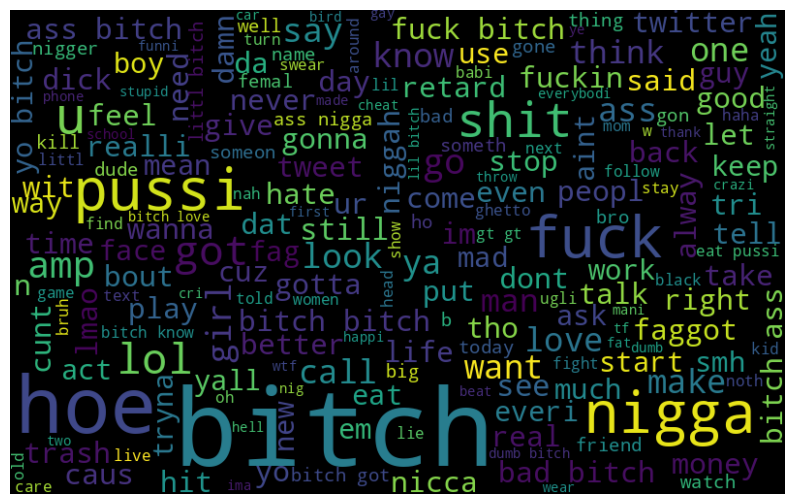

In [ ]:
offensive_words = ' '.join([text for text in dataset['processed_tweets'][dataset['class'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(offensive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
tfidfVectorizer=TfidfVectorizer(ngram_range=(1,2),max_df=0.80,min_df=5,max_features=10000)
tfidf=tfidfVectorizer.fit_transform(dataset['processed_tweets'])
tfidf


<24783x6441 sparse matrix of type '<class 'numpy.float64'>'
	with 189618 stored elements in Compressed Sparse Row format>

In [ ]:
X = tfidf
y = dataset['class'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.55      0.18      0.27       290
           1       0.92      0.96      0.94      3832
           2       0.85      0.85      0.85       835

    accuracy                           0.90      4957
   macro avg       0.77      0.66      0.68      4957
weighted avg       0.88      0.90      0.88      4957

Logistic Regression, Accuracy Score: 0.8973169255598143


In [ ]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)


              precision    recall  f1-score   support

           0       0.51      0.17      0.25       290
           1       0.93      0.96      0.94      3832
           2       0.83      0.92      0.87       835

    accuracy                           0.90      4957
   macro avg       0.75      0.68      0.69      4957
weighted avg       0.89      0.90      0.89      4957

Random Forest, Accuracy Score: 0.9035707080895703


In [ ]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_tfidf,y_train)
y_preds = nb.predict(X_test_tfidf)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.10      0.39      0.16       290
           1       0.89      0.68      0.77      3832
           2       0.54      0.58      0.56       835

    accuracy                           0.65      4957
   macro avg       0.51      0.55      0.50      4957
weighted avg       0.79      0.65      0.70      4957

Naive Bayes, Accuracy Score: 0.6491829735727255


In [ ]:
X=panda.DataFrame(tfidf.toarray())
y=dataset['class'].astype(int)
X_train_bow,X_test_bow,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
support=LinearSVC()
support.fit(X_train_bow,y_train)
y_preds=support.predict(X_test_bow)
acc3=accuracy_score(y_test,y_preds)
report=classification_report(y_test,y_preds)
print(report)
print("Linear SVC, Accuracy Score:",acc3)

              precision    recall  f1-score   support

           0       0.46      0.26      0.33       290
           1       0.92      0.95      0.94      3832
           2       0.83      0.85      0.84       835

    accuracy                           0.89      4957
   macro avg       0.74      0.69      0.70      4957
weighted avg       0.88      0.89      0.89      4957

Linear SVC, Accuracy Score: 0.8932822271535202


In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents=[TaggedDocument(doc,[i]) for i,doc in enumerate(dataset['processed_tweets'])]
model=Doc2Vec(documents,vector_size=5,window=2,min_count=1,workers=4)
doc2vec_df=df["processed_tweets"].apply(lambda x: model.infer_vector(x.split(" "))).apply(panda.Series)
doc2vec_df.columns=["doc2vec_vector_"+str(x) for x in doc2vec_df.columns]
doc2vec_df

,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,0.038694,-0.095934,0.014755,0.065082,-0.052151
1,0.073266,-0.045020,0.020965,0.009451,0.032203
2,0.009097,-0.052823,-0.043513,0.006992,0.025614


In [ ]:
# Install gensim using pip
!pip install gensim

# Now, change your import statement:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS

sentiment_analyzer = VS()
# ... (rest of your code) ...

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sentiment_analyzer = VS()
def count_tags(tweet_c):

    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', tweet_c)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def sentiment_analysis(tweet):
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    twitter_objs = count_tags(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],twitter_objs[0], twitter_objs[1],
                twitter_objs[2]]
    #features = pandas.DataFrame(features)
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

final_features = sentiment_analysis_array(tweet)


new_features = panda.DataFrame({'Neg':final_features[:,0],'Pos':final_features[:,1],'Neu':final_features[:,2],'Compound':final_features[:,3],
                            'url_tag':final_features[:,4],'mention_tag':final_features[:,5],'hash_tag':final_features[:,6]})
new_features

,Neg,Pos,Neu,Compound,url_tag,mention_tag,hash_tag
0,0.000,0.120,0.880,0.4563,0.0,1.0,0.0
1,0.237,0.000,0.763,-0.6876,0.0,1.0,0.0
2,0.538,0.000,0.462,-0.9550,0.0,2.0,0.0
3,0.000,0.344,0.656,0.5673,0.0,2.0,0.0
4,0.249,0.081,0.669,-0.7762,0.0,1.0,1.0
...,...,...,...,...,...,...,...
24778,0.000,0.000,1.000,0.0000,0.0,3.0,3.0
24779,0.454,0.000,0.546,-0.8074,0.0,0.0,0.0
24780,0.000,0.219,0.781,0.4738,0.0,0.0,0.0
24781,0.573,0.000,0.427,-0.7717,0.0,0.0,0.0


In [ ]:
tfidf_a = tfidf.toarray()
modelling_features = np.concatenate([tfidf_a,final_features],axis=1)
modelling_features.shape

(24783, 6448)

In [ ]:
X=panda.DataFrame(modelling_features)
y=dataset['class'].astype(int)
X_train_bow,X_test_bow,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
model = LogisticRegression().fit(X_train_bow,y_train)
y_preds = model.predict(X_test_bow)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.60      0.19      0.29       290
           1       0.92      0.96      0.94      3832
           2       0.85      0.84      0.85       835

    accuracy                           0.90      4957
   macro avg       0.79      0.67      0.69      4957
weighted avg       0.89      0.90      0.89      4957

Logistic Regression, Accuracy Score: 0.898930804922332


In [ ]:
X = panda.DataFrame(modelling_features)
y = dataset['class'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_bow,y_train)
y_preds = rf.predict(X_test_bow)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.52      0.16      0.24       290
           1       0.91      0.96      0.94      3832
           2       0.84      0.84      0.84       835

    accuracy                           0.89      4957
   macro avg       0.76      0.65      0.67      4957
weighted avg       0.88      0.89      0.88      4957

Random Forest, Accuracy Score: 0.8944926366754085


In [ ]:
X = panda.DataFrame(modelling_features)
y = dataset['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train,y_train)
y_preds = nb.predict(X_test)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.10      0.39      0.16       290
           1       0.89      0.68      0.77      3832
           2       0.54      0.59      0.56       835

    accuracy                           0.65      4957
   macro avg       0.51      0.55      0.50      4957
weighted avg       0.79      0.65      0.70      4957

Naive Bayes, Accuracy Score: 0.650191648174299


In [ ]:
X = panda.DataFrame(modelling_features)
y = dataset['class'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
support =LinearSVC(random_state=20)
support.fit(X_train_bow,y_train)
y_preds = support.predict(X_test_bow)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.45      0.26      0.33       290
           1       0.92      0.95      0.94      3832
           2       0.83      0.85      0.84       835

    accuracy                           0.89      4957
   macro avg       0.73      0.68      0.70      4957
weighted avg       0.88      0.89      0.88      4957

SVM, Accuracy Score: 0.8908614081097438


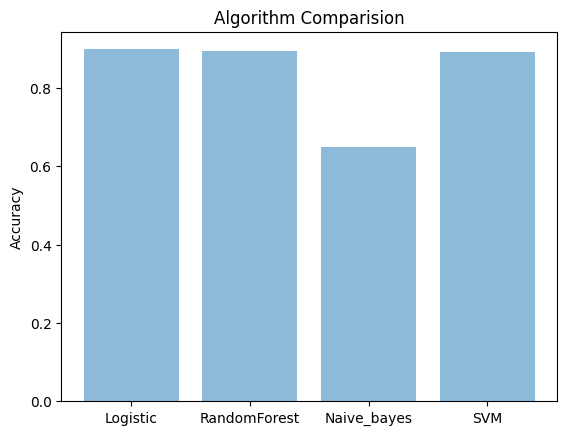

In [ ]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision')
plt.show()

In [ ]:
def additional_features(tweet):
  syllables=textstat.syllable_count(tweet)
  num_chars=sum(len(w)  for w in tweet)
  num_chars_total=len(tweet)
  num_words=len(tweet.split())
  avg_syllable=round(float((syllables+0.001))/float(num_words+0.001),4)
  num_unique_terms=len(set(tweet.split()))
  FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syllable) - 15.59,1)
  FRE = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syllable)),2)
  add_features=[FKRA,FRE,syllables,avg_syllable,num_chars,num_chars_total,num_words,num_unique_terms]
  return add_features
def get_additional_feature_array(tweets):
  features=[]
  for t in tweets:
    features.append(additional_features(t))
  return np.array(features)
fFeatures=get_additional_feature_array(processed_tweets)


In [ ]:
# Reshaping or repeating the doc2vec_df array to match the required shape
doc2vec_df_resized = np.tile(doc2vec_df, (tfidf_a.shape[0] // doc2vec_df.shape[0], 1))

# Now, concatenate the arrays
modelling_features_enhanced = np.concatenate([tfidf_a, final_features, doc2vec_df_resized, fFeatures], axis=1)

print("Shape of the resulting concatenated features:", modelling_features_enhanced.shape)


Shape of the resulting concatenated features: (24783, 6461)


In [ ]:
# Assuming doc2vec_df and fFeatures should have the same number of rows as tfidf_a

# Check the shape of each array before concatenation
print("Shape of tfidf_a:", tfidf_a.shape)
print("Shape of final_features:", final_features.shape)
print("Shape of doc2vec_df:", doc2vec_df.shape)
print("Shape of fFeatures:", fFeatures.shape)

# If doc2vec_df or fFeatures have incorrect shapes, investigate their generation process
# For doc2vec_df, ensure all tweets are processed correctly to generate vectors
# For fFeatures, ensure it

Shape of tfidf_a: (24783, 6441)
Shape of final_features: (24783, 7)
Shape of doc2vec_df: (3, 5)
Shape of fFeatures: (24783, 8)


In [ ]:
X = panda.DataFrame(modelling_features_enhanced)
y = dataset['class'].astype(int)
X_train_features, X_test_features, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

model = LogisticRegression().fit(X_train_features,y_train)
y_preds = model.predict(X_test_features)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       279
           1       0.82      0.96      0.88      3852
           2       0.59      0.31      0.41       826

    accuracy                           0.80      4957
   macro avg       0.47      0.42      0.43      4957
weighted avg       0.73      0.80      0.75      4957

Logistic Regression, Accuracy Score: 0.7962477304821465


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


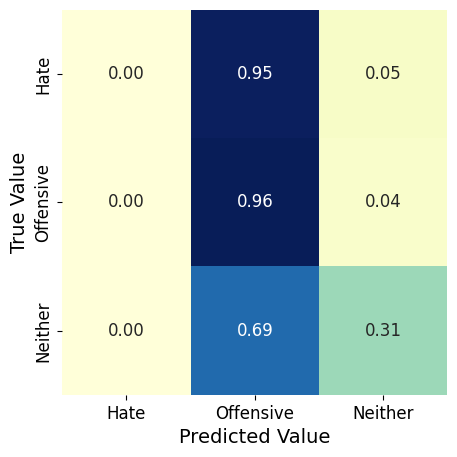

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_preds)
import seaborn as sns
import matplotlib.pyplot as plt
matrix_proportions=np.zeros((3,3))
for i in range(0,3):
  matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

In [ ]:
testing_index=list(X_test_features.index[0:10])
print("Predicted Class:",y_preds[0:10])
print("Actual Class:",y_test.tolist()[0:10])

Predicted Class: [1 1 1 1 1 1 1 1 1 1]
Actual Class: [2, 1, 1, 0, 2, 1, 1, 1, 2, 2]


Text(0, 0.5, 'Count')

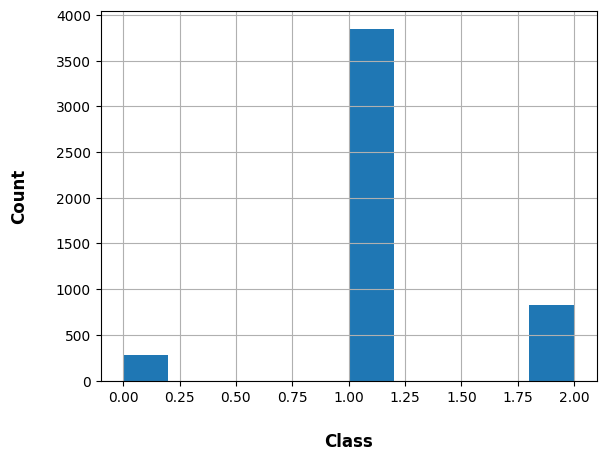

In [ ]:
ax=y_test.hist()
ax.set_xlabel("Class", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Count", labelpad=20, weight='bold', size=12)

Text(0, 0.5, 'Count')

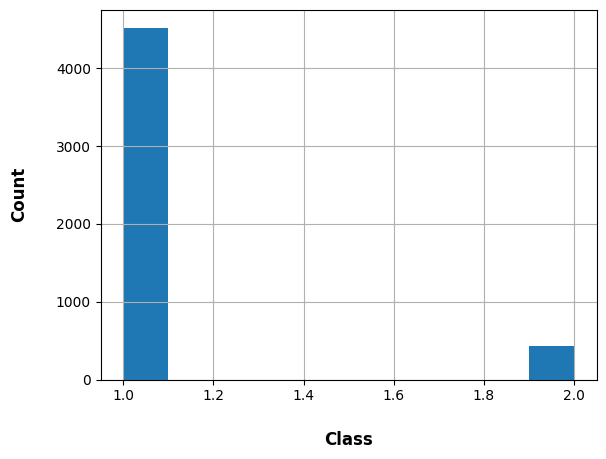

In [ ]:
ax=panda.Series(y_preds).hist()
ax.set_xlabel("Class", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Count", labelpad=20, weight='bold', size=12)

In [ ]:
X = panda.DataFrame(modelling_features_enhanced)
y = dataset['class'].astype(int)
X_train_features, X_test_features, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_features,y_train)
y_preds = rf.predict(X_test_features)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.44      0.06      0.11       279
           1       0.89      0.97      0.93      3852
           2       0.86      0.73      0.79       826

    accuracy                           0.88      4957
   macro avg       0.73      0.59      0.61      4957
weighted avg       0.86      0.88      0.86      4957

Random Forest, Accuracy Score: 0.8809763970143232


In [ ]:
X = panda.DataFrame(modelling_features_enhanced)
y = dataset['class'].astype(int)
X_train_features, X_test_features, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_features,y_train)
y_preds = nb.predict(X_test_features)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.09      0.36      0.15       279
           1       0.90      0.69      0.78      3852
           2       0.59      0.65      0.62       826

    accuracy                           0.66      4957
   macro avg       0.53      0.57      0.51      4957
weighted avg       0.80      0.66      0.72      4957

Naive Bayes, Accuracy Score: 0.662497478313496


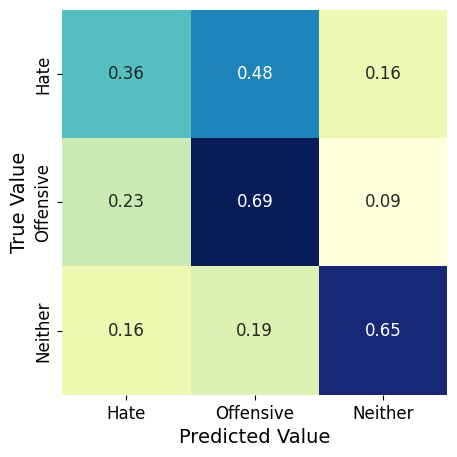

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

In [ ]:
X=panda.DataFrame(modelling_features_enhanced)
y=dataset['class'].astype(int)
X_train_features,X_test_features,y_train,y_test_helo=train_test_split(X,y,random_state=42,test_size=0.2)
support=LinearSVC(random_state=20)
support.fit(X_train_features,y_train)
y_preds=support.predict(X_test_features)
acc3=accuracy_score(y_test_helo,y_preds)
report=classification_report(y_test,y_preds)
print(report)
print(" SVM, Accuracy Score:",acc3)

              precision    recall  f1-score   support

           0       0.03      0.02      0.02       279
           1       0.77      0.79      0.78      3852
           2       0.16      0.16      0.16       826

    accuracy                           0.64      4957
   macro avg       0.32      0.32      0.32      4957
weighted avg       0.63      0.64      0.64      4957

 SVM, Accuracy Score: 0.8930804922332055


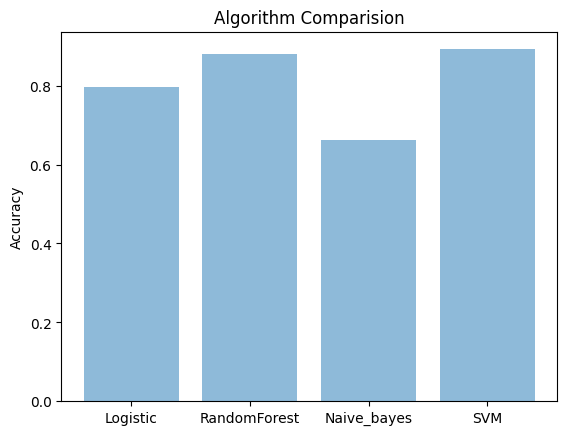

In [ ]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision')
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Assuming tfidf is a fitted TF-IDF vectorizer
tfidf_a = tfidf.toarray()  # Convert to dense array
print("TF-IDF shape:", tfidf_a.shape)

# Convert doc2vec_df to a NumPy array if it is a DataFrame
if isinstance(doc2vec_df, pd.DataFrame):
    doc2vec_array = doc2vec_df.to_numpy()
else:
    doc2vec_array = doc2vec_df

# Print the shape of the converted Doc2Vec array
print("Doc2Vec shape:", doc2vec_array.shape)


TF-IDF shape: (24783, 6441)
Doc2Vec shape: (3, 5)


In [ ]:
# Reshaping or repeating the doc2vec_df array to match the required shape
doc2vec_df_resized = np.tile(doc2vec_df, (tfidf_a.shape[0] // doc2vec_df.shape[0], 1))

# Now, concatenate the arrays
modelling_features_enhanced = np.concatenate([tfidf_a, final_features, doc2vec_df_resized, fFeatures], axis=1)

print("Shape of the resulting concatenated features:", modelling_features_enhanced.shape)


Shape of the resulting concatenated features: (24783, 6461)


In [ ]:
import numpy as np

# Ensure tfidf, doc2vec_df, and fFeatures are already defined
# Check the shape of each array
print("TF-IDF shape:", tfidf.shape)
print("Doc2Vec shape:", doc2vec_df.shape)
print("Feature shape:", fFeatures.shape)

# Convert TF-IDF to dense array (if it's sparse)
tfidf_a = tfidf.toarray()

# Check if the number of rows in all the dataframes match
if tfidf_a.shape[0] != doc2vec_df.shape[0]:
    print(f"Mismatch in rows: TF-IDF has {tfidf_a.shape[0]} rows, Doc2Vec has {doc2vec_df.shape[0]} rows")
    # If doc2vec_df has fewer rows, repeat its rows to match tfidf_a
    if doc2vec_df.shape[0] < tfidf_a.shape[0]:
        doc2vec_df = np.repeat(doc2vec_df, tfidf_a.shape[0] // doc2vec_df.shape[0], axis=0)
        print(f"Reshaped Doc2Vec to match rows: {doc2vec_df.shape[0]} rows")
    else:
        raise ValueError("Doc2Vec rows are larger than TF-IDF rows, check your data.")

if tfidf_a.shape[0] != fFeatures.shape[0]:
    print(f"Mismatch in rows: TF-IDF has {tfidf_a.shape[0]} rows, Features has {fFeatures.shape[0]} rows")
    # If fFeatures has fewer rows, repeat its rows to match tfidf_a
    if fFeatures.shape[0] < tfidf_a.shape[0]:
        fFeatures = np.repeat(fFeatures, tfidf_a.shape[0] // fFeatures.shape[0], axis=0)
        print(f"Reshaped Features to match rows: {fFeatures.shape[0]} rows")
    else:
        raise ValueError("Features rows are larger than TF-IDF rows, check your data.")

# Now concatenate the arrays along axis 1 (columns)
modelling_features_one = np.concatenate([tfidf_a, doc2vec_df, fFeatures], axis=1)

# Check the shape of the resulting array
print("Shape of concatenated features:", modelling_features_one.shape)


TF-IDF shape: (24783, 6441)
Doc2Vec shape: (3, 5)
Feature shape: (24783, 8)
Mismatch in rows: TF-IDF has 24783 rows, Doc2Vec has 3 rows
Reshaped Doc2Vec to match rows: 24783 rows
Shape of concatenated features: (24783, 6454)


In [ ]:
X = panda.DataFrame(modelling_features_one)
y = dataset['class'].astype(int)
X_train_features, X_test_features, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
support =LinearSVC(random_state=20)
support.fit(X_train_features,y_train)
y_preds = support.predict(X_test_features)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" ,acc3 )

              precision    recall  f1-score   support

           0       0.51      0.25      0.33       279
           1       0.93      0.96      0.94      3852
           2       0.83      0.85      0.84       826

    accuracy                           0.90      4957
   macro avg       0.76      0.69      0.71      4957
weighted avg       0.89      0.90      0.89      4957

SVM, Accuracy Score: 0.8991325398426467


In [ ]:
tfidf_a = tfidf.toarray()
modelling_features_two = np.concatenate([tfidf_a,final_features,fFeatures],axis=1)
modelling_features_two.shape


In [ ]:
import pandas as pd


In [ ]:
X = pd.DataFrame(modelling_features_two)
y = dataset['class'].astype(int)
X_train_features, X_test_features, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
support =LinearSVC(random_state=20)
support.fit(X_train_features,y_train)
y_preds = support.predict(X_test_features)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" ,acc3 )


NameError: name 'modelling_features_two' is not defined

In [ ]:
modelling_features_three = np.concatenate([final_features,fFeatures],axis=1)
modelling_features_three.shape

NameError: name 'np' is not defined

In [ ]:
x=pandas.DataFrame(modelling_features_three)
y=dataset['class'].astype(int)
X_train_features,X_test_features,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
support=LinearSVC(random_state=20)
support.fit(X_train_features,y_train)
y_preds=support.predict(X_test_features)
acc3=accuracy_score(y_test,y_preds)
report=classification_report
print(report)
print("SVM, Accuracy Score:" ,acc3 )

NameError: name 'pandas' is not defined

In [ ]:
X = panda.DataFrame(modelling_features_two)
y = dataset['class'].astype(int)
X_train_features, X_test_features, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_features,y_train)
y_preds = nb.predict(X_test_features)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

NameError: name 'modelling_features_two' is not defined

In [ ]:
X = panda.DataFrame(modelling_features_two)
y = dataset['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

model = LogisticRegression().fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

NameError: name 'modelling_features_two' is not defined

In [ ]:
X=panda.DataFrame(modelling_features_three)
y=dataset['class'].astype(int)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_preds=rf.predict(X_test)
acc1=accuracy_score(y_test,y_preds)
report=classification_report(y_test,y_preds)
print(report)
print("Random Forest, Accuracy Score:",acc1)

NameError: name 'modelling_features_three' is not defined

In [ ]:
from sklean.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_preds)
matrix_proportions=np.zeros((3,3))
for i in range(0,3):
  matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df=panda.DataFrame(matrix_proportions,index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False,square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

ModuleNotFoundError: No module named 'sklean'